In [2]:
#importing the needed libraries
import pickle
import math
import numpy as np

#importing matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import winter

%matplotlib inline
#gets pickle files from directories
pickleContents = open ( r"C:\Users\DGama\OneDrive\Documents\School\poly\SURP-2024\NS_SURP2024\week_2-3\eostable.pk", "rb" )

pickle = pickle.load(pickleContents)

#retrive the local values from the pickle binary, and stores them in the correspoing list
p_local = pickle["DS_CMF1_wcrust/"]['ps']
rho_local = pickle["DS_CMF1_wcrust/"]['rhos']

In [3]:
#ps_to_rhos routine
def ps_to_rho(p_target):
    
    #rho_local = x
    for x in range(len(rho_local)-1):
    #first case: when the p_targer is less that the first value of the p_local
        if p_target < p_local[0]:
                p_target = p_local[0]
                x = 0
                break
    #second case: when the p_target is greater than the last value of the p_local    
        if p_target >= p_local[-1]:
                #have to do this as otherwise it would try to access a value that does not exist
                p_target = p_local[-1]
                x = len(p_local)-2
                break
    #Deafult case, When the rho target is between the given parameters needed
        if p_local[x] < p_target and p_local[x+1] > p_target:
                #local = x
                break
   # print("rho_Local:",rho_local[x],)
    rho_target = rho_local[x] + (((rho_local[x+1] - rho_local[x]) / (p_local[x+1] - p_local[x])) * (p_target - p_local[x]))
    return rho_target
##

In [4]:
##
#rhos to ps subroutine
def rho_to_ps(rho_target):
    for x in range(len(rho_local)-1):
        
        #p_local = x
    #first case: when the p_targer is less that the first value of the p_local
        if rho_target < rho_local[0]:
                rho_target = rho_local[0]
                x = 0
                break
    #second case: when the p_target is greater than the last value of the p_local    
        if rho_target >= rho_local[-1]:
                #have to do this as otherwise it would try to access a value that does not exist
                rho_target = rho_local[-1]
                x = len(rho_local)-2
                break
    #Deafult case, When the rho target is between the given parameters needed
        if rho_local[x] < rho_target and rho_local[x+1] > rho_target:
                #local = x
                break
    #Equation used:  
    #print("p_Local: ",p_local[x])
    p_target = p_local[x] + (((p_local[x+1] - p_local[x]) / (rho_local[x+1] - rho_local[x])) * (rho_target - rho_local[x]))
    
    return p_target
##

In [5]:
def euler(rho_c, dr):
    
    pass

    #get the values from the end user to the function
    r = dr
    rho = rho_c
    #Declaring variables
    #
    #speed of ligth
    c = 2.99792458e10
    #Gravitational constant
    G = 6.6743e-8
    #Pi
    pi = math.pi
    
    p = rho_to_ps(rho)
    
    #forgot to initiate before using
    #i replace every other instance of m with mr 
    mr = 4.0 /3.0 * pi * r**3 * rho
    #
   

#pulled the exponent value from google for these ones as the physics book gave me metric values
#if these are wrong the exponent would be the issue, the other numbers should be okay(hopefully)
#
 ###
    rs = [r]
    rhos = [rho]
    ps = [p]
    ms = [mr]
   ### 
    for i in range(10000):
    
        # calculate the derivative
        #most the issues here where from wrong syntax and forgetting physics constants 
        
        
        #debuging to see whats variable is storing
        
        print("for loop iteration: ", i)
        print("r",r)
        print("p",p)
        print("mr",mr)
        print("rho",rho)
        print("------------")
        #should be commented out once debugging is complete
        
        #Tolman-Oppenheimer-Volkoff Equation
        #re wrote the equation thinking that was the issue, it turs out not putting in parantetheses each part of the fraction
        #that caused mr in the first case multiplyhing stuff by 0 leading to all values being null exept for r
        
        #dPdr = ((G*mr*rho)/(r**2))*(1+(p)/(rho*c**2))*(1+(4*pi*r**3*p)/(mr*c**2))*((1-((2*G*mr)/(c**2*r))**-1))
        dPdr = (-(G*mr*rho)/(r**2))*(1+(p)/(rho*c**2))*(1+((4*pi*r**3*p)/(mr*c**2)))*((1-((2*G*mr)/(c**2*r)))**-1)   
        #Mass conversion equation
        dmdr = 4*pi*r**2*rho
        
        #final notes at 6/14/2024 at 3:12, the issue with the euler method running seems to be at mr*c**2 making a division by zero
        #while i belive that the change could be fixed in less than 20 minutes, i have worked on finishing this up since 7 and thus will wait till the progress report for this
        
        # use the derivative 
        m_new = mr + dmdr * dr
        p_new = p + dPdr * dr
        #call subroutine to find rho from p_new
        rho_new = ps_to_rho(p_new)
        r_new = r + dr
        
        # append the new data
        rs.append(r_new)
        ps.append(p_new)
        ms.append(m_new)
        rhos.append(rho_new)
        
        # replace old by your new values
        r = r_new
        rho = rho_new
        p = p_new
        mr = m_new
        
        #print(r, rho, p, mr)
        
        if rho < 1e-4 * rho_c:
            #following 2 lines should be commented after debugging is done
            print("break condition met!")
            print(rho , " < ", 1**-4*rho_c)
            break
        # setup criteria to end the calculation
        # this is to prevent the graph to be 90% a flat graph isnce thwe change of desity will be neglible
  
    rs = np.array(rs)
    rhos = np.array(rhos)
    ps = np.array(ps)
    ms = np.array(ms)

    return rs, rhos, ps, ms



    
rs, rhos, ps, ms = euler(1e15,1000)

#

for loop iteration:  0
r 1000
p 2.2867672859170018e+35
mr 4.1887902047863903e+24
rho 1000000000000000.0
------------
for loop iteration:  1
r 2000
p 2.2867611018730888e+35
mr 1.6755160819145563e+25
rho 999998708501238.2
------------
for loop iteration:  2
r 3000
p 2.286752240870819e+35
mr 6.70205783587739e+25
rho 999996857936523.6
------------
for loop iteration:  3
r 4000
p 2.2867379752241195e+35
mr 1.801175585289992e+26
rho 999993878645737.9
------------
for loop iteration:  4
r 5000
p 2.286717842255844e+35
mr 3.811782575874448e+26
rho 999989674001662.9
------------
for loop iteration:  5
r 6000
p 2.2866916920362383e+35
mr 6.953342789383723e+26
rho 999984212692410.1
------------
for loop iteration:  6
r 7000
p 2.286659459424882e+35
mr 1.147716479045608e+27
rho 999977481113812.0
------------
for loop iteration:  7
r 8000
p 2.2866211108686564e+35
mr 1.763454773096394e+27
rho 999969472258509.9
------------
for loop iteration:  8
r 9000
p 2.2865766270604207e+35
mr 2.5676779405489117e+27


In [ ]:
def find_mass(ms):
    return ms[-1]
def find_radius(rs):
    return rs[-1]

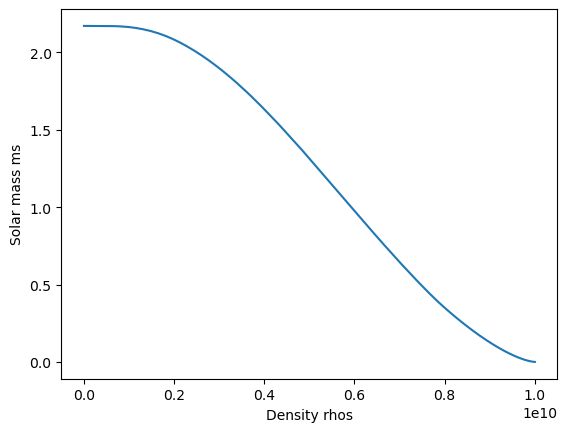

In [6]:
    
# x-axis values 
    
rhos = rhos / 1e5
ms = ms / 2e33
    
fig, ax = plt.subplots(ncols=1, nrows=1)
x = rhos
ax.set_xlabel('Density rhos')
# Y-axis values 
y = ms
ax.set_ylabel('Solar mass ms')
# Function to plot 
ax.plot(x, y)
 
# function to show the plot 
plt.show()

In [ ]:
#dm function

In [ ]:
#Runge-Kutta Routine

def runge_kutta():
    return rs, rhos, ps, ms     
